In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
files = os.listdir('./Data/')

This loop processes each file in the 'files' list. For each file, it reads the data into a DataFrame and performs several transformations:
- Converts the 'TIME' column to datetime format.
- Drops unnecessary columns.
- Groups the DataFrame by 'TIME' and sums the other columns.
- Calculates bike usage as the negative difference in 'AVAILABLE BIKES', replacing negative values with 0 and filling any missing values with 0.
- Resamples the DataFrame to daily frequency, sums the other columns, and appends the result to the 'df_mean' DataFrame.
The end result is a DataFrame ('df_mean') that contains daily bike usage data, aggregated from all files in the 'files' list.

In [ ]:
df_mean = pd.DataFrame(columns = ['TIME','BIKE STANDS','AVAILABLE BIKE STANDS','AVAILABLE BIKES'])
for file in files:
    df = pd.read_csv(f"./Data/{file}")
    df['TIME'] = pd.to_datetime(df['TIME'])
    df.drop(['LAST UPDATED','NAME','STATUS','STATION ID',
            'ADDRESS','LATITUDE','LONGITUDE'], axis=1, inplace=True)
    df = df.sort_values(by=['TIME'])

    df = df.groupby('TIME').sum().reset_index()
    df['BIKE USAGE'] =  -df['AVAILABLE BIKES'].diff()
    df['BIKE USAGE'] = df['BIKE USAGE'].apply(lambda x: 0 if x < 0 else x)
    df['BIKE USAGE'].fillna(0, inplace=True)
    df_mean = pd.concat([df_mean,df.resample('D',on='TIME').sum().reset_index()]
                         ,ignore_index=True)

In [ ]:
df_mean.to_csv('UsageByDayClean.csv', index=False,encoding='utf-8')

this next cell was used to create different files for daily, weekly, monthly, and quarterly aggregations but
only the daily aggregations really ended up being used. I simply changed the resample to get those different files and below it is set to create the daily aggregation file.

In [ ]:
df = pd.read_csv('./UsageByDayClean.csv')
df['TIME'] = pd.to_datetime(df['TIME'])
# here the data is resampled to days and the sum of the bike usage is taken
df = df.resample('D',on='TIME').sum().reset_index()
# set all days with no recorded data to NA to then drop from df
df = df.replace(0,pd.NA)
df = df.dropna()
df.set_index('TIME',inplace=True)

this next block was used to calculate the average bike usage per week/month/quarter 
this was because there were missing days in the data

In [ ]:
count_days_recorded = df.resample('D',on='TIME').count()
count_days_recorded.replace(0,1,inplace=True)
count_days_recorded.to_csv('dayCount.csv')
# avg bike usage column was created to have the total usage per period and the average usage per period
# this is to normalize the periods with missing days of recorded data
df['AVG BIKE USAGE'] = df['BIKE USAGE'] / count_days_recorded['BIKE USAGE']

In [ ]:
df.to_csv('monthlyAvg.csv')

In [2]:
df = pd.read_csv('./UsageByDayClean.csv')

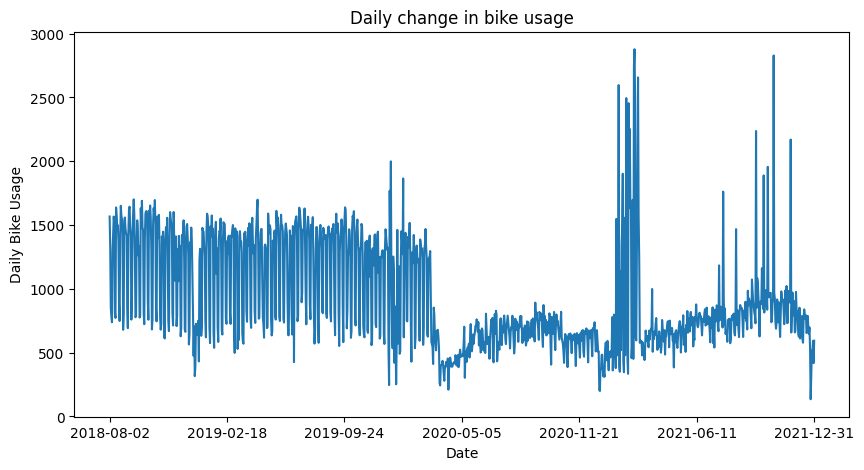

In [10]:
# simple plot to show the change in bike usage over time
df = df.groupby('TIME').sum()
df['BIKE USAGE'].plot(kind='line')
# set size of plot 10 x 20
plt.rcParams["figure.figsize"] = (5,5)
plt.title('Daily change in bike usage')
plt.xlabel('Date')
plt.ylabel('Daily Bike Usage')
plt.show()